#### Gradient descent:
<br>

$f(x) \longrightarrow  \displaystyle \min_{x} $

$x^{t+1} = x^t-\alpha{f'(x^t)}$

$f(x^{t+1}) = f(x^t-\alpha{f'(x^t)})$

$f(\textbf{X}) = 10\cdot\sum\limits_{i, j}x_{ij}^2$

$f'(\textbf{X})_{\textbf{X}} = ? $

$f'(\textbf{X})_{x_{kl}} = \Big( 10\cdot\sum\limits_{i, j}x_{ij}^2\Big)_{x_{kl}}' = 10 \cdot\Big(\sum\limits_{i, j}x_{ij}^2\Big)_{x_{kl}}' $

$ \quad = 10 \cdot\sum\limits_{i, j}\Big(x_{ij}^2\Big)_{x_{kl}}' $

$ \quad = 10 \cdot\sum\limits_{i, j}2 x_{ij} \big(x_{ij}\big)_{x_{kl}}' $


$ \quad = 10 \cdot 2 x_{kl} \cdot 1 = 20 x_{kl} $

$f(\textbf{X}) = 10\cdot\sum\limits_{i, j}x_{ij}^2$

$f'(\textbf{X})_{\textbf{X}} = 20 \textbf{X} $

In [1]:
import torch

x = torch.tensor(
    [[1.,  2.,  3.,  4.],
     [5.,  6.,  7.,  8.],
     [9., 10., 11., 12.]], requires_grad=True)

#######
device = torch.device('cuda:0' 
                      if torch.cuda.is_available() 
                      else 'cpu')
x = x.to(device)
#######

function = 10 * (x ** 2).sum()

function.backward()

print(x.grad, '<- gradient')

tensor([[ 20.,  40.,  60.,  80.],
        [100., 120., 140., 160.],
        [180., 200., 220., 240.]]) <- gradient


In [2]:
print(function.grad_fn)
print(function.grad_fn.next_functions[0][0])
print(function.grad_fn.next_functions[0][0].next_functions[0][0])
print(function.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0])

In [3]:
x = torch.tensor(
    [[1.,  2.,  3.,  4.],
     [5.,  6.,  7.,  8.],
     [9., 10., 11., 12.]], requires_grad=True)

In [4]:
function = 10 * (x ** 2).sum()
function.backward()

In [5]:
x, function

(tensor([[ 1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.],
         [ 9., 10., 11., 12.]], requires_grad=True),
 tensor(6500., grad_fn=<MulBackward0>))

In [6]:
x.grad

tensor([[ 20.,  40.,  60.,  80.],
        [100., 120., 140., 160.],
        [180., 200., 220., 240.]])

In [7]:
x.data -= 0.001 * x.grad

In [8]:
x.grad.zero_()

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def show_contours(objective,
                  x_lims=[-10.0, 10.0], 
                  y_lims=[-10.0, 10.0],
                  x_ticks=100,
                  y_ticks=100):
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
    res = []
    for x_index in range(X.shape[0]):
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val, y_val]]).T))
    res = np.array(res)
    plt.figure(figsize=(7,7))
    plt.contour(X, Y, res, 100)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

In [10]:
import torch

x = torch.tensor(
    [8., 8.], requires_grad=True)
var_history = []
fn_history = []

def function_parabola(variable):
    return 10 * (variable ** 2).sum()

def make_gradient_step(function, variable):
    function_result = function(variable)
    function_result.backward()
    variable.data -= 0.001 * variable.grad
    variable.grad.zero_()

for i in range(500):
    var_history.append(x.data.cpu().numpy().copy())
    fn_history.append(function_parabola(x).data.cpu().numpy().copy())
    make_gradient_step(function_parabola, x)

In [1]:
import torch

x = torch.tensor(
    [8., 8.], requires_grad=True)
var_history = []
fn_history = []

optimizer = torch.optim.SGD([x], lr=0.001)

def function_parabola(variable):
    return 10 * (variable ** 2).sum()

def make_gradient_step(function, variable):
    function_result = function(variable)
    function_result.backward()
    optimizer.step()
    optimizer.zero_grad()
    
for i in range(500):
    var_history.append(x.data.numpy().copy())
    fn_history.append(function_parabola(x).data.cpu().numpy().copy())
    make_gradient_step(function_parabola, x)

In [2]:
show_contours(function_parabola)
plt.scatter(np.array(var_history)[:,0], np.array(var_history)[:,1], s=10, c='r');

NameError: name 'show_contours' is not defined

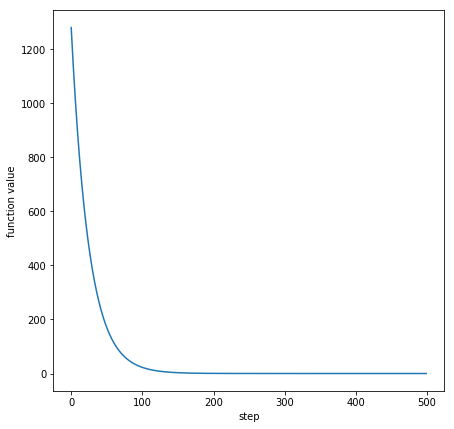

In [7]:
plt.figure(figsize=(7,7))
plt.plot(fn_history);
plt.xlabel('step')
plt.ylabel('function value');

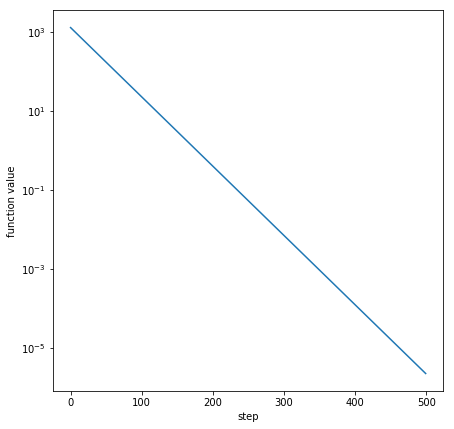

In [8]:
plt.figure(figsize=(7,7))
plt.semilogy(fn_history);
plt.xlabel('step')
plt.ylabel('function value');

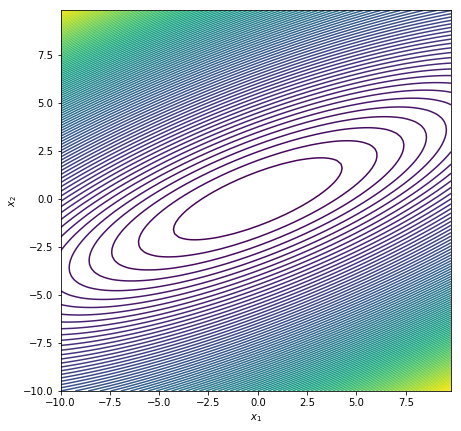

In [17]:
def function_skewed(variable):
    gramma = torch.tensor([[1., -1.], [1., 1.]]) @ torch.tensor([[1.0, 0.0], [0.0, 4.0]])
    res = 10 * (variable.unsqueeze(0) @ (gramma @ variable.unsqueeze(1))).sum()
    return res

def function_skewed_np(variable):
    gramma = np.array([[1, -1], [1, 1]]) @ np.array([[1.0, 0.0], [0.0, 4.0]])
    res = 10 * (variable.transpose(1, 0) @ (gramma @ variable)).sum()
    return res

show_contours(function_skewed_np)

In [21]:
x = torch.tensor(
    [8., 8.], requires_grad=True)
var_history = []
fn_history = []

optimizer = torch.optim.SGD([x], lr=0.001)

for i in range(500):
    var_history.append(x.data.cpu().numpy().copy())
    print(x.data.cpu().numpy().copy(), "***|||***", x.data.cpu())
    fn_history.append(function_skewed(x).data.cpu().numpy().copy())
    make_gradient_step(function_skewed, x)
    

[8. 8.] ***|||*** tensor([8., 8.])
[8.08 7.6 ] ***|||*** tensor([8.0800, 7.6000])
[8.1463995 7.2344   ] ***|||*** tensor([8.1464, 7.2344])
[8.200503  6.9000397] ***|||*** tensor([8.2005, 6.9000])
[8.243494  6.5940514] ***|||*** tensor([8.2435, 6.5941])
[8.276445  6.3138323] ***|||*** tensor([8.2764, 6.3138])
[8.300331 6.057019] ***|||*** tensor([8.3003, 6.0570])
[8.316035  5.8214674] ***|||*** tensor([8.3160, 5.8215])
[8.324359  5.6052313] ***|||*** tensor([8.3244, 5.6052])
[8.326029  5.4065437] ***|||*** tensor([8.3260, 5.4065])
[8.321705 5.223801] ***|||*** tensor([8.3217, 5.2238])
[8.311985 5.055548] ***|||*** tensor([8.3120, 5.0555])
[8.297412 4.900464] ***|||*** tensor([8.2974, 4.9005])
[8.278478  4.7573495] ***|||*** tensor([8.2785, 4.7573])
[8.255629 4.625116] ***|||*** tensor([8.2556, 4.6251])
[8.229269  4.5027757] ***|||*** tensor([8.2293, 4.5028])
[8.199767  4.3894315] ***|||*** tensor([8.1998, 4.3894])
[8.167455 4.28427 ] ***|||*** tensor([8.1675, 4.2843])
[8.132634 4.186552

[1.6678067 0.6908282] ***|||*** tensor([1.6678, 0.6908])
[1.6551754  0.68559617] ***|||*** tensor([1.6552, 0.6856])
[1.6426399 0.6804037] ***|||*** tensor([1.6426, 0.6804])
[1.6301992 0.6752506] ***|||*** tensor([1.6302, 0.6753])
[1.6178527 0.6701365] ***|||*** tensor([1.6179, 0.6701])
[1.6055998 0.6650612] ***|||*** tensor([1.6056, 0.6651])
[1.5934396 0.6600243] ***|||*** tensor([1.5934, 0.6600])
[1.5813715  0.65502554] ***|||*** tensor([1.5814, 0.6550])
[1.5693948  0.65006465] ***|||*** tensor([1.5694, 0.6501])
[1.5575088 0.6451413] ***|||*** tensor([1.5575, 0.6451])
[1.545713  0.6402553] ***|||*** tensor([1.5457, 0.6403])
[1.5340064  0.63540626] ***|||*** tensor([1.5340, 0.6354])
[1.5223885  0.63059396] ***|||*** tensor([1.5224, 0.6306])
[1.5108585 0.6258181] ***|||*** tensor([1.5109, 0.6258])
[1.4994159 0.6210784] ***|||*** tensor([1.4994, 0.6211])
[1.4880599  0.61637455] ***|||*** tensor([1.4881, 0.6164])
[1.47679   0.6117064] ***|||*** tensor([1.4768, 0.6117])
[1.4656054  0.60707

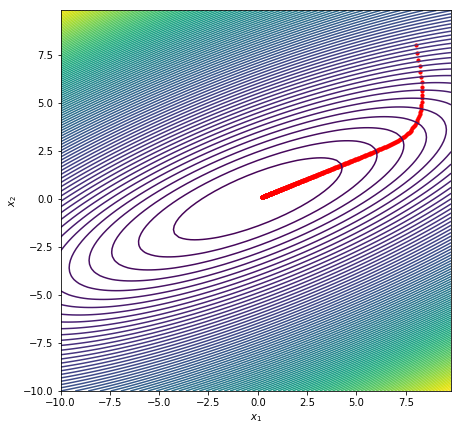

In [22]:
show_contours(function_skewed_np)
plt.scatter(np.array(var_history)[:,0], np.array(var_history)[:,1], s=10, c='r');